In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numpoints=1000
numbins=16 #choose even number that is a power of two

In [3]:
points=np.random.normal(size=numpoints)

In [4]:
counts,edges=np.histogram(points,bins=numbins)

In [6]:
deltax=(edges[1]-edges[0])

(array([  2.,   5.,   2.,  19.,  34.,  74., 126., 139., 168., 165., 133.,
         72.,  34.,  18.,   5.,   4.]),
 array([-3.63861758, -3.21555325, -2.79248891, -2.36942457, -1.94636024,
        -1.5232959 , -1.10023156, -0.67716723, -0.25410289,  0.16896144,
         0.59202578,  1.01509012,  1.43815445,  1.86121879,  2.28428312,
         2.70734746,  3.1304118 ]),
 <BarContainer object of 16 artists>)

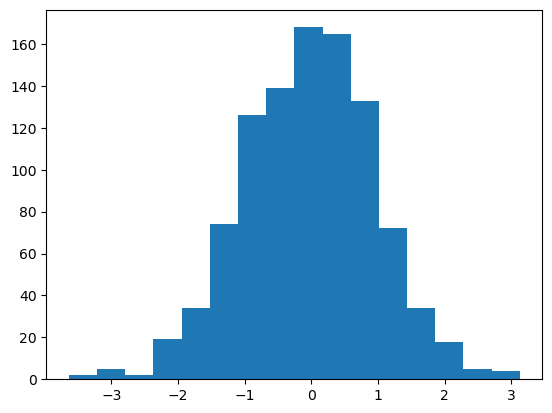

In [7]:
plt.hist(points,edges)

In [8]:
density=counts/deltax

In [9]:
fftdensity=np.fft.fft(density)

In [10]:
fftdensity

array([ 2.36370669e+03 +0.j        , -1.55637762e+03+32.77637427j,
        4.58379175e+02-52.91104543j,  5.11826418e-03+74.02209013j,
       -6.61837872e+01-66.18378721j,  5.76263473e+01+40.5942296j ,
        2.38169885e+01-34.00139195j, -7.07550840e+01 -0.65148626j,
        1.89096535e+01 +0.j        , -7.07550840e+01 +0.65148626j,
        2.38169885e+01+34.00139195j,  5.76263473e+01-40.5942296j ,
       -6.61837872e+01+66.18378721j,  5.11826418e-03-74.02209013j,
        4.58379175e+02+52.91104543j, -1.55637762e+03-32.77637427j])

tried with real fft version to see and then it just removes the complex conjugates? not sure why those are needed. is it safe to use the real version since the inputs are real numbers? after reading the documentation it seems like yes but i'll leave it as complex for now
array([ 714.28129336  +0.j        , -303.21198538-321.2861087j ,
         -2.14326754+111.23818116j]) for five bins - no use the full version


In [12]:
deltak=2*np.pi/deltax

plot the fourier transform by multiplying each point by its complex conjugate to get real numbers and put the ks on the x axis - the ks should be 1*deltak, 2*deltak, etc

In [14]:
k=np.arange(1,numbins+1)
k=k*deltak

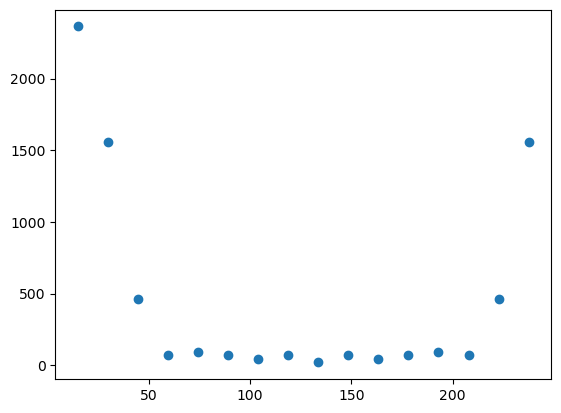

In [15]:
plt.scatter(k,np.absolute(fftdensity))

In [16]:
fftpotential=fftdensity*(-1/k**2)

In [17]:
potential=np.fft.ifft(fftpotential).real

In [18]:
potential

array([-0.5722572 , -0.57668958, -0.58982144, -0.61617913, -0.65242986,
       -0.69932195, -0.74679418, -0.77851417, -0.79610078, -0.78823636,
       -0.75448867, -0.7033981 , -0.65511852, -0.61801816, -0.59169096,
       -0.57728577])

now need potential gradient. need to add ghost cells and then just do simple centered difference method. remember that deltax is the binlength. do zero outflow gradient for ghost cells.

In [20]:
potentialghosts=np.insert(potential,0,potential[0]) #the ghost cells should be equal to the one next to it! not zero

In [21]:
potentialghosts=np.append(potentialghosts,potential[-1])

In [22]:
potentialghosts

array([-0.5722572 , -0.5722572 , -0.57668958, -0.58982144, -0.61617913,
       -0.65242986, -0.69932195, -0.74679418, -0.77851417, -0.79610078,
       -0.78823636, -0.75448867, -0.7033981 , -0.65511852, -0.61801816,
       -0.59169096, -0.57728577, -0.57728577])

In [23]:
gradient=np.zeros(numbins)
for i in range(numbins):
    gradient[i]=(potentialghosts[i+1]-potentialghosts[i-1])/(2*deltax)

In [24]:
gradient

array([ 0.00594303, -0.00523842, -0.02075835, -0.04667085, -0.07399397,
       -0.09826262, -0.11152479, -0.09359358, -0.05827317, -0.01149021,
        0.04917941,  0.10026639,  0.11744095,  0.10090656,  0.07496207,
        0.04813972])

now iterate to the next step

In [26]:
deltat=1

In [27]:
vt=np.zeros(numpoints)

In [28]:
edges

array([-3.63861758, -3.21555325, -2.79248891, -2.36942457, -1.94636024,
       -1.5232959 , -1.10023156, -0.67716723, -0.25410289,  0.16896144,
        0.59202578,  1.01509012,  1.43815445,  1.86121879,  2.28428312,
        2.70734746,  3.1304118 ])

In [29]:
binlabels=np.digitize(points.round(5),edges.round(5),right=True)

In [30]:
np.where(binlabels==16)

(array([218, 393, 769, 877]),)

In [31]:
points[71].round(5)

1.33557

In [32]:
vt1=np.zeros(numpoints)

In [33]:
for i in range(numpoints):
    ibin=binlabels[i]
    vt1[i]=vt[i]*points[i]-deltat*gradient[ibin-1]

In [35]:
points=points+vt1*deltat

(array([  1.,   5.,   2.,  14.,  33.,  56., 113., 139., 187., 202., 137.,
         63.,  28.,  12.,   4.,   3.]),
 array([-3.63861758, -3.21555325, -2.79248891, -2.36942457, -1.94636024,
        -1.5232959 , -1.10023156, -0.67716723, -0.25410289,  0.16896144,
         0.59202578,  1.01509012,  1.43815445,  1.86121879,  2.28428312,
         2.70734746,  3.1304118 ]),
 <BarContainer object of 16 artists>)

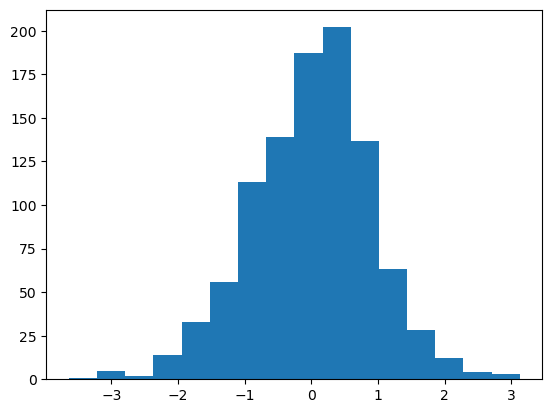

In [37]:
plt.hist(points,edges)